# Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

print('Libraries imported!')

Libraries imported!


# Read Datasets

In [2]:
# The code was removed by Watson Studio for sharing.

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#make a copy of the train and test datasets so we still have the original data in case we make any changes to the other data

train_original= train.copy()
test_original=test.copy()

In [4]:
#check the data types of each column
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
#view the shape of the train data
train.shape

(614, 13)

In [6]:
#view the shape of the test data
test.shape

(367, 12)

There are 614 rows and 13 columns in the train dataset and 367 rows and 12 columns in the test dataset

# Data Exploration

## Univarite analysis 

Univariate analysis will be carried out to examine each variable individually. For categorical variables, we can use bar plots or frequency table. For numerical variables, we'll use probability density plots to visualize the distribution of the variables

### Target Variable 

In [7]:
#let's start with the target variable, i.e., loan_status

train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [8]:
#let's normalize the value counts to True, so we'll see proportions instead of numbers

train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

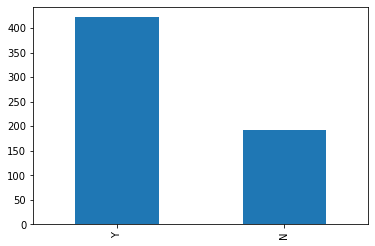

In [9]:
train['Loan_Status'].value_counts().plot.bar()

plt.show()

About 69% (422 people) had their loan approved

### Independent Variables (Categorical)

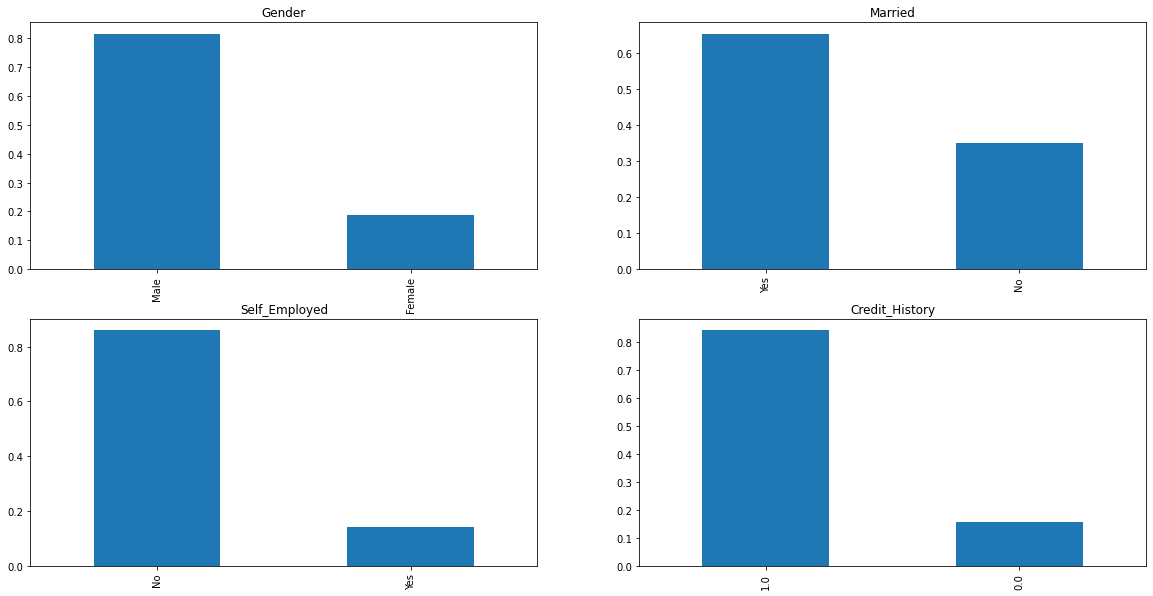

In [10]:
#visualize the categorical variables

plt.figure(1) 
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Married')

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Self_Employed')

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Credit_History')

plt.show()

From the above bar plots,
* 80% of the applicants in the train dataset are male
* about 65% are married
* about 15% are self employed
* about 85% have repaid their debts

### Independent Variables (Ordinal)

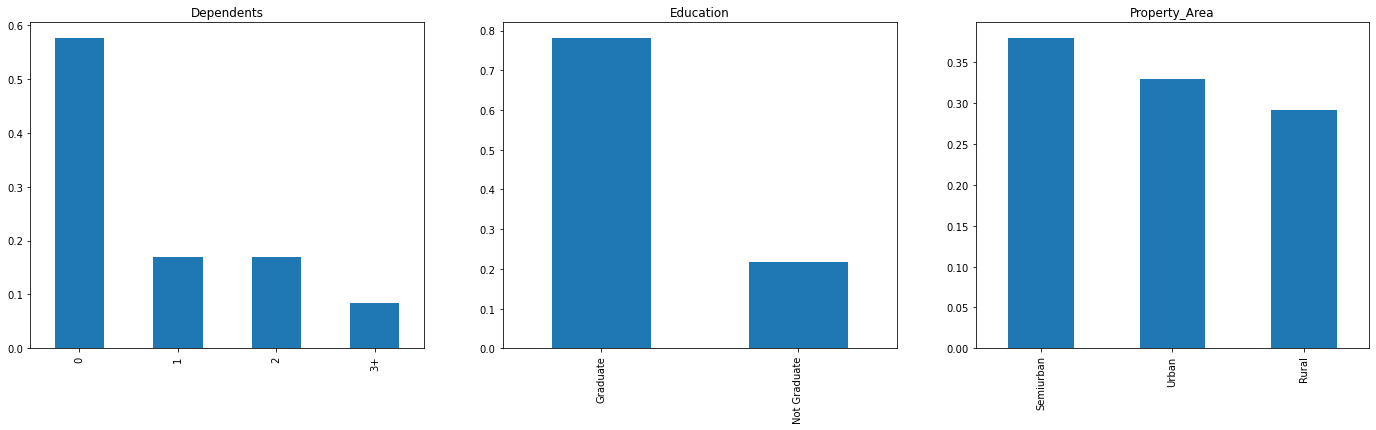

In [11]:
#visualize the ordinal variables

plt.figure(1) 
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents')

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Property_Area')

plt.show()

From the plots above,
* most of the applicants have no dependents
* about 80% are graduates
* most are from Semiurban area

### Independent Variables (Numerical)

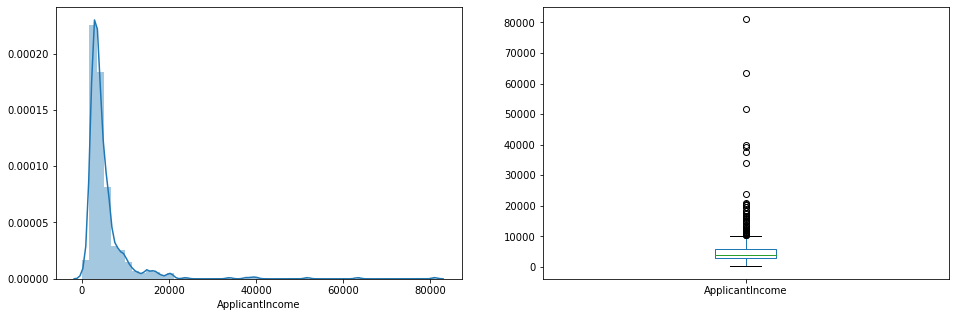

In [12]:
#visualize the numerical variables, starting with the applicants income

plt.figure(1) 
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

In the distribution of the applicant income, most of the data ia towards the left, that is, not normally distributed.

From the box plots, we can see the presence of lots of outliers, possibly due to income disparity in the society

Text(0.5, 0.98, '')

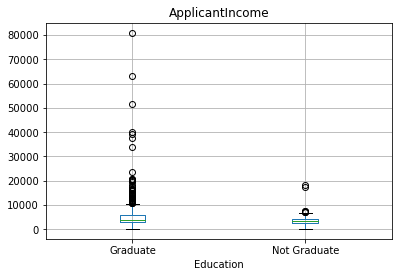

In [13]:
#segregate applicant income by education

train.boxplot(column='ApplicantIncome', by= 'Education')
plt.suptitle("")

There are a higher number of grauduates with very high incomes; these appear to be the outliers

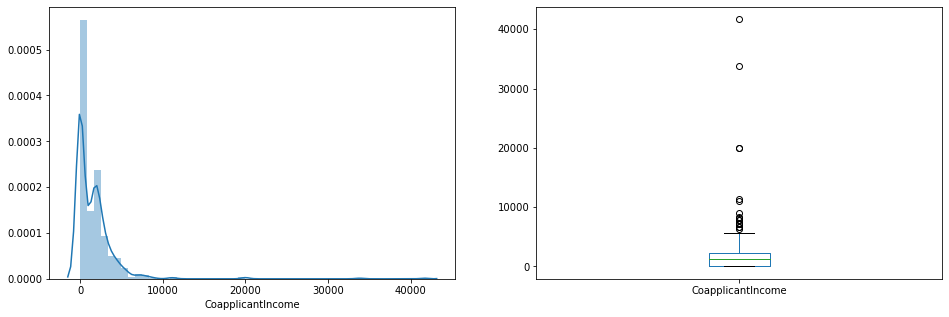

In [14]:
#lets view the coapplicants income

plt.figure(1) 
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

The coapplicant income also has a lot of outliers, and is not normally distributed

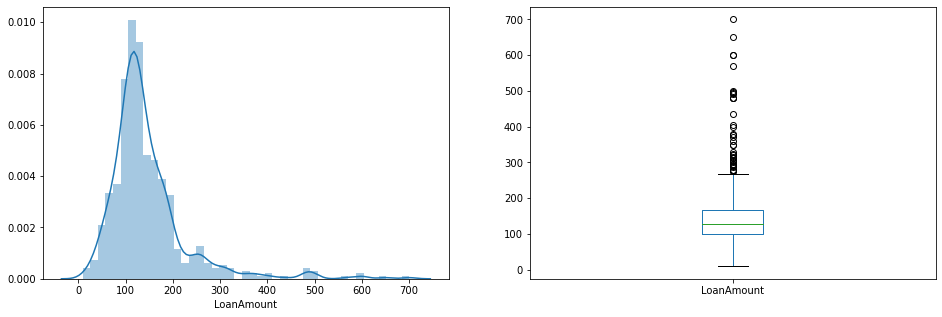

In [15]:
# loan amount variable

plt.figure(1) 
plt.subplot(121)
df=train.dropna()  #drop rows with missing values
sns.distplot(train['LoanAmount'])

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

The distribution is fairly normal, however, skewed to the right, and there are lots of outliers.

## Bivariate analysis 

Let's check how well each feature correlates with the Loan Status

### Categorical Independent Variable vs Target Variable 

In [16]:
Gender= pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.head()

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [17]:
Gender.div(Gender.sum(1).astype(float),axis=0)

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


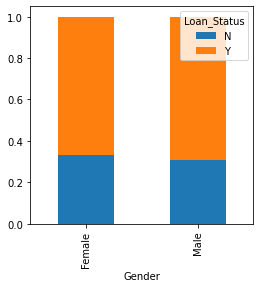

In [18]:
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

The proportion of male and female applicants can be inferred to be about the same for both approved and unapproved loans

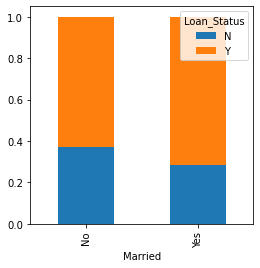

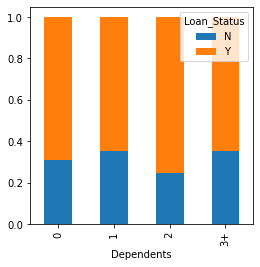

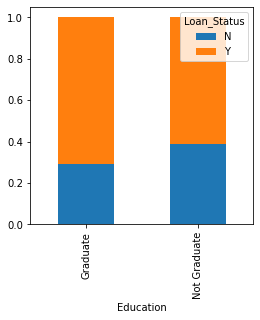

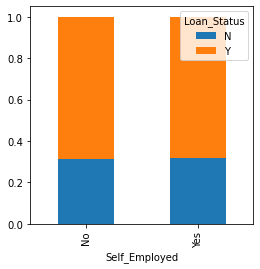

In [19]:
#visualize the remaining categorical variables vs target variable

Married= pd.crosstab(train['Married'],train['Loan_Status'])
Dependents= pd.crosstab(train['Dependents'],train['Loan_Status'])
Education= pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed= pd.crosstab(train['Self_Employed'],train['Loan_Status'])

Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()


* Proportion of married applicants is higher for approved loans
* Applicants distribution is similar for applicants irrespective of their number of dependents
* Proportion of graduate applicants is also higher for approved loans
* Nothing significant can be inferred from Self_Emploed vs Loan_Status plot

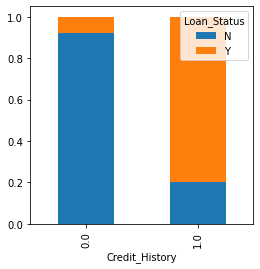

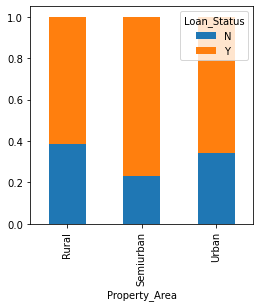

In [20]:
#visualize other categorical independent variables vs Loan_Status

Credit_History= pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area= pd.crosstab(train['Property_Area'],train['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

* Apllicants with credit history of 1 are more likely to get their loans approved
* Applicants in suburban area have higher chances of getting their loans approved compared to those in rural or urban areas

### Numerical Independent Variable vs Target Variable 

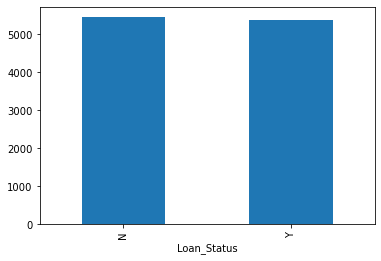

In [21]:
#first, find the mean income of people for which loan has been approved
#vs mean income of people for which loan has not been approved

#group the dataset by loan_status and find the mean of the applicantincome of each group
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
plt.show()

Let's define the above plot more so that we can be able to infer some meanings from it

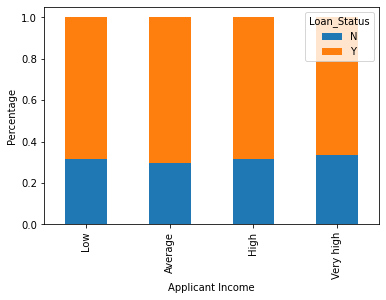

In [22]:
#make bins for the applicant income variable based on the values in  it

bins=[0,2500,4000,6000,81000]
group=['Low', 'Average', 'High', 'Very high']
train['Income_bin']= pd.cut(train['ApplicantIncome'], bins, labels=group) #add a column that categorizes the applicant incomes based on the defined bins

Income_bin= pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)

plt.xlabel('Applicant Income')
plt.ylabel('Percentage')

plt.show()

Therefore, applicant income does not affect the chances of loan approval. Let's check for the coapplicant income too

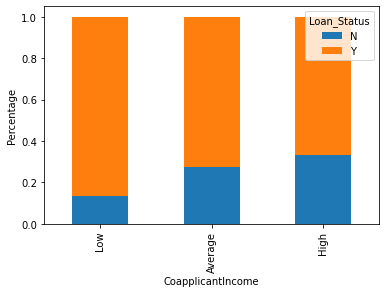

In [23]:
#make bins for the coapplicant income variable based on the values in  it

bins=[0,1000,3000,42000]
group=['Low', 'Average', 'High']
train['Coapplicant_Income_bin']= pd.cut(train['CoapplicantIncome'], bins, labels=group) #add a column that categorizes the coapplicant incomes based on the defined bins

Coapplicant_Income_bin= pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)

plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')

plt.show()

This shows that the lesser the coapplicant's income, the higher the cahnces of loan approval. However, this doesn't lookright and couldbe due to the fact that most of the applicants have no coapplicant, hence, their coapplicant income is 0. 
Lets then combine the applicants and coapplicants income to visualize the combined effect of income on loan approval.

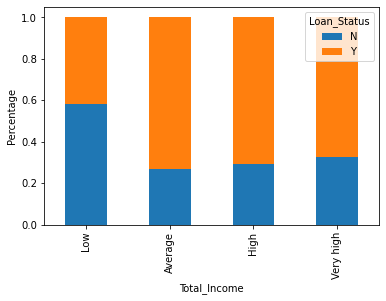

In [24]:
#create a new column called Total_Income which is the sum of thh applicant and coapplicant incomes
train['Total_Income']= train['ApplicantIncome']+train['CoapplicantIncome']

#make bins for the total income variable based on the values in  it
bins=[0,2500,4000,6000,81000]
group=['Low', 'Average', 'High', 'Very high']
train['Total_Income_bin']= pd.cut(train['Total_Income'], bins, labels=group)

Total_Income_bin= pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)

plt.xlabel('Total_Income')
plt.ylabel('Percentage')

plt.show()


Now we can see that the lesser the income, the lower the chances of loan approval.

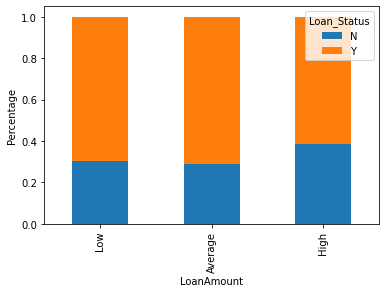

In [25]:
#lets now visaulize the Loan Amount variable, which is also a numerical independent variable

#make bins for the loan amount variable based on the values in  it
bins=[0,100,200,700]
group=['Low', 'Average', 'High']
train['LoanAmount_bin']= pd.cut(train['LoanAmount'], bins, labels=group)

LoanAmount_bin= pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)

plt.xlabel('LoanAmount')
plt.ylabel('Percentage')

plt.show()

The proportion of approved loans is higher for Low and Average Loan Amount, compared to that of High Loan Amount.

In [26]:
#drop the bins created and the total income columns
train=train.drop(['Income_bin','Coapplicant_Income_bin','LoanAmount_bin','Total_Income_bin','Total_Income'],axis=1)

#replace the 3+ in dependent variables with 3, so it can be a numerical variable
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)

#replace the N and Y in Loan status with 0 and 1 respectively for say logistic regression purposes
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

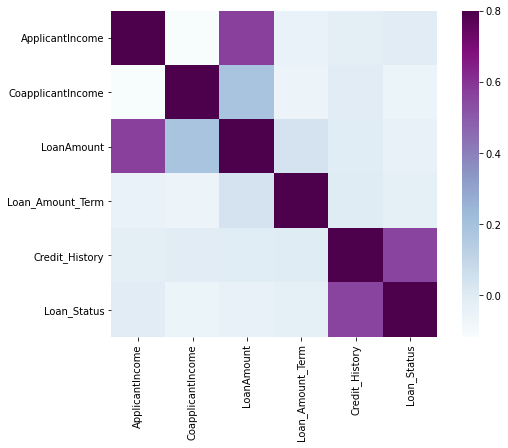

In [27]:
#using heatmap, lets look at the correlation between all the numerical variables

matrix= train.corr()
f, ax= plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=.8, square=True, cmap='BuPu')
plt.show()

Most correlated variables include (ApplicantIncome and LoanAmount) and (Credit_History and Loan_Status). LoanAmount is also correlated with CoapplicantIncome

## Deal with Missing Values 

In [28]:
#identify missing values

train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History all have mising values.

Replace the numerical variables with the mean or median of the respective columns
Replace the categorical variables with the mode of the respective columns

In [29]:
#missing values in categorical variables

train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [30]:
#missing values in Loan_Amount_Term

#check the value counts in Loan_Amount_Term
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [31]:
#the mode is 360. Use this to replace the missing values in the column

train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [32]:
#missing values in LoanAmount column
#replace missing values with median as the presence of outliers won't make the use of mean the best approach
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

#confirm that all missing vales in the train dataset has been replaces
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [33]:
#lets also fill the missing values in the test dataset

test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Married'].fillna(train['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

## Outlier Treatment 

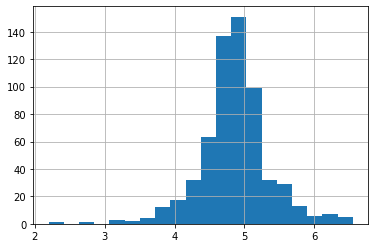

In [34]:
#the LoanAmount distribution is skewed to the right, as the right tail is longer.
#remove the skewness by doing log transformation
#log transformation does not affect smaller values much, but reduced the larger vakues

train['LoanAmount_log']= np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

#do same for test dataset
test['LoanAmount_log']= np.log(test['LoanAmount'])

This distribution now looks closer to normal

# Model Development

## Logistic Regression

In [35]:
#drop the Loan_ID column as it has no effect on the loan status

train= train.drop('Loan_ID', axis=1)
test= test.drop('Loan_ID', axis=1)

In [36]:
#place the target data in a separate dataframe
X= train.drop('Loan_Status', 1)
y= train[['Loan_Status']]

Apply one hot encoding to the categorical variables, tat is, convert to dummy variables to make them easier to quantify and comparre

In [37]:
X= pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [38]:
#split the train dataset for prediction and validation 

from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv= train_test_split(X, y, test_size=0.3)

#import LogisticRegression model and accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#fit the model
model= LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1,
                   max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

#predict the Loan_Status for the validation set 
pred_cv= model.predict(x_cv)

#calculate its accuracy
accuracy_score(y_cv, pred_cv)

0.7621621621621621

The predictions are almost 80% accurate, that is, 80% of the loan status have been identified correctly.

In [39]:
#make predictions for the test dataset
pred_test= model.predict(test)

In [40]:
#import the submission file

body = client_8b5253ff328b43bfbaecf9596af5680c.get_object(Bucket='loanprediction-donotdelete-pr-ryib7lj0wjnmzv',Key='sample_submission_49d68Cx.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
    
submission = pd.read_csv(body)

#set Loan_ID as the index 
submission= submission.set_index('Loan_ID')

In [41]:
#fill the columns with Loan_Status of pred_test
submission1=submission.copy() #make a copy of the submission file so that its contents isn't altered
submission1['Loan_Status']=pred_test

#replace the dummy variables
submission1['Loan_Status'].replace(0, 'N', inplace=True)
submission1['Loan_Status'].replace(1, 'Y', inplace=True)

In [42]:
#convert submission file to .csv format

from IPython.display import HTML
import pandas as pd
import base64, io

# Download as CSV: data frame, optional title and filename
def create_download_link_csv(df, title = "Download CSV file", filename = "logistic.csv"):  
    # generate in-memory CSV, then base64-encode it
    csv = df.to_csv(index=True)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)


# Download as CSV
create_download_link_csv(submission1,"Download my data","logistic.csv")

From the submission, an accuracy of 0.76388 was gotten on the leaderboard

### Cross Validation 
Stratified k-folds cross Validation can be used instead of creating a validation set to validate predictions

In [43]:
#import StratifiedKFold
from sklearn.model_selection import StratifiedKFold

#make a cross validation logistic model with stratified 5 folds and make predictions
i=1
kf=StratifiedKFold(n_splits=5,random_state=1, shuffle=True) 
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xv1= X.iloc[train_index],X.iloc[test_index]
    ytr,yv1= y.iloc[train_index], y.iloc[test_index]
    
    model= LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test= model.predict(xv1)
    score= accuracy_score(yv1, pred_test)
    print('accuracy_score', score)

    i+=1
    pred_test=model.predict(test)
    pred=model.predict_proba(xv1) [:,1]


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.7950819672131147


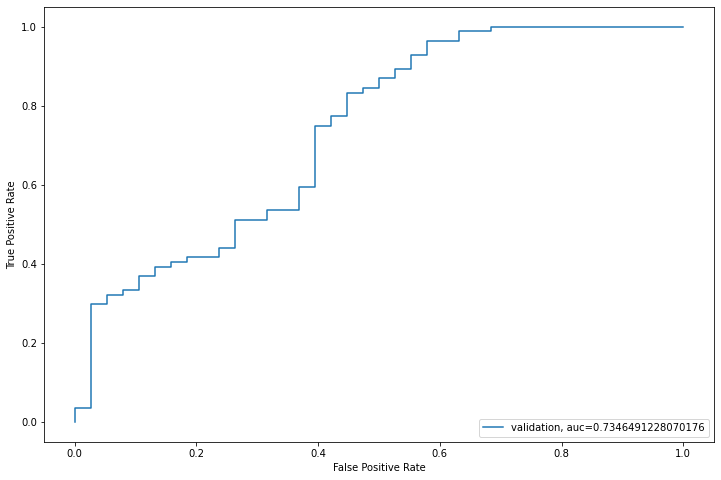

In [44]:
#lets visualize the roc curve

from sklearn import metrics 
fpr, tpr, _ = metrics.roc_curve(yv1, pred)
auc= metrics.roc_auc_score(yv1, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label='validation, auc=' + str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

The auc value = 0.7346

In [45]:
#fill the columns with Loan_Status of pred_test
submission_cvLR=submission.copy() #make a copy of the submission file so that its contents isn't altered

submission_cvLR['Loan_Status']=pred_test

#replace the dummy variables
submission_cvLR['Loan_Status'].replace(0, 'N', inplace=True)
submission_cvLR['Loan_Status'].replace(1, 'Y', inplace=True)

In [46]:
#convert submission file to .csv format

from IPython.display import HTML
import pandas as pd
import base64, io

# Download as CSV: data frame, optional title and filename
def create_download_link_csv(df, title = "Download CSV file", filename = "logistic2.csv"):  
    # generate in-memory CSV, then base64-encode it
    csv = df.to_csv(index=True)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

# Download as CSV
create_download_link_csv(submission_cvLR,"Download my data","logistic2.csv")

From the submission, an accuracy of 0.76388 was gotten on the leaderboard 

### Feature Engineering
This will help improve accuracy of the model.
There are some features that might affect the target variable. Examples are Total Income, Balance income, EMI (i.e., monthly loan repayment amount). Lets work on these features.

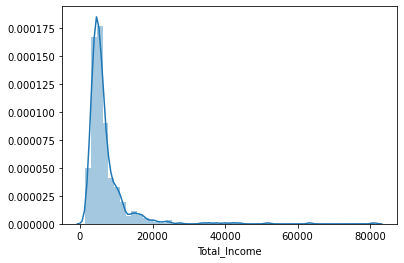

In [47]:
train['Total_Income']= train['ApplicantIncome']+ train['CoapplicantIncome']
test['Total_Income']= test['ApplicantIncome']+ test['CoapplicantIncome']

#check distribution of Total Income
sns.distplot(train['Total_Income']);

The distribution is right skewed. To make the distribution normal, lets apply log transformation

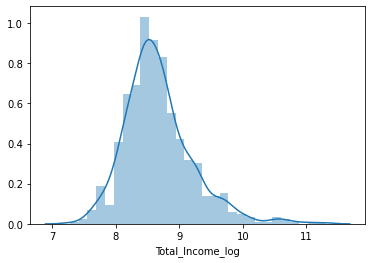

In [48]:
train['Total_Income_log']= np.log(train['Total_Income'])
test['Total_Income_log']= np.log(test['Total_Income'])

#visualize the plot after log transformation
sns.distplot(train['Total_Income_log']);

The distribution now looks fairly normal, and the effect of outliers ahve been dealt with. Lets move on to EMI feature

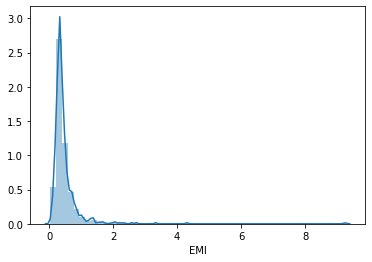

In [49]:
#create EMI feature

train['EMI']= train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']= test['LoanAmount']/test['Loan_Amount_Term']

#check distribution of EMI
sns.distplot(train['EMI']);

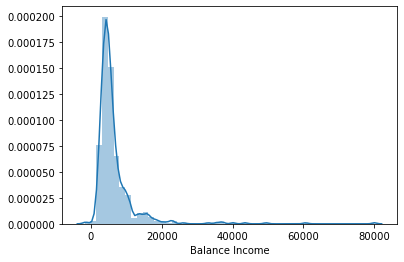

In [50]:
#create Balance Income feature
train['Balance Income']= train['Total_Income']-(train['EMI']*1000) #multiply with 1000 to make the units equal
test['Balance Income']= test['Total_Income']-(test['EMI']*1000)

#check distribution of Balance Income
sns.distplot(train['Balance Income']);

In [51]:
#drop the variables that were used to create the above features
#this is because there will be high correlation between the old and new features, plus the noise will be reduced

train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [52]:
train.head()

,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance Income
0,1.0,1,4.852030,0,1,1,0,0,1,0,...,0,1,0,0,0,1,5849.0,8.674026,0.355556,5493.444444
1,1.0,0,4.852030,0,1,0,1,0,0,1,...,0,1,0,1,0,0,6091.0,8.714568,0.355556,5735.444444
2,1.0,1,4.189655,0,1,0,1,0,1,0,...,0,0,1,0,0,1,3000.0,8.006368,0.183333,2816.666667
3,1.0,1,4.787492,0,1,0,1,0,1,0,...,1,1,0,0,0,1,4941.0,8.505323,0.333333,4607.666667
4,1.0,1,4.948760,0,1,1,0,0,1,0,...,0,1,0,0,0,1,6000.0,8.699515,0.391667,5608.333333


##  Logistic Regression after Feature Engineering

In [53]:
#place the target data in a separate dataframe
X= train.drop('Loan_Status', axis= 1)
y= train.Loan_Status

In [54]:
#make a cross validation logistic model with stratified 5 folds and make predictions
i=1
kf=StratifiedKFold(n_splits=5,random_state=1, shuffle=True) 
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xv1= X.loc[train_index],X.loc[test_index]
    ytr,yv1= y[train_index], y[test_index]
    
    model= LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test= model.predict(xv1)
    score= accuracy_score(yv1, pred_test)
    print('accuracy_score', score)

    i+=1
    pred_test=model.predict(test)
    pred=model.predict_proba(xv1)[:,1]


1 of kfold 5
accuracy_score 0.7886178861788617

2 of kfold 5
accuracy_score 0.6910569105691057

3 of kfold 5
accuracy_score 0.6666666666666666

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.680327868852459


In [55]:
#fill the columns with Loan_Status of pred_test
submission_feLR=submission.copy() #make a copy of the submission file so that its contents isn't altered

submission_feLR['Loan_Status']=pred_test

#replace the dummy variables
submission_feLR['Loan_Status'].replace(0, 'N', inplace=True)
submission_feLR['Loan_Status'].replace(1, 'Y', inplace=True)


In [56]:
#convert submission file to .csv format
from IPython.display import HTML
import pandas as pd
import base64, io

# Download as CSV: data frame, optional title and filename
def create_download_link_csv(df, title = "Download CSV file", filename = "logistic3.csv"):  
    # generate in-memory CSV, then base64-encode it
    csv = df.to_csv(index=True)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

#set Loan_ID as the index 
#submission= submission.set_index('Loan_ID')

# Download as CSV
create_download_link_csv(submission_feLR,"Download my data","logistic3.csv")

The feature engineering did not improve the model much, as the accuracy on the leaderboard was 0.7222

## Decision Tree
Lets make use of another classification algorithm for our loan prediction

In [57]:
from sklearn import tree

#make a cross validation decision tree model with stratified 5 folds and make predictions
i=1
kf=StratifiedKFold(n_splits=5,random_state=1, shuffle=True) 
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xv1= X.loc[train_index],X.loc[test_index]
    ytr,yv1= y[train_index], y[test_index]
    
    model= tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test= model.predict(xv1)
    score= accuracy_score(yv1, pred_test)
    print('accuracy_score', score)

    i+=1
    pred_test=model.predict(test)


1 of kfold 5
accuracy_score 0.7398373983739838

2 of kfold 5
accuracy_score 0.6991869918699187

3 of kfold 5
accuracy_score 0.7560975609756098

4 of kfold 5
accuracy_score 0.7073170731707317

5 of kfold 5
accuracy_score 0.6721311475409836


In [58]:
#fill the columns with Loan_Status of pred_test
submission_DT=submission.copy() #make a copy of the submission file so that its contents isn't altered

submission_DT['Loan_Status']=pred_test

#replace the dummy variables
submission_DT['Loan_Status'].replace(0, 'N', inplace=True)
submission_DT['Loan_Status'].replace(1, 'Y', inplace=True)

#convert submission file to .csv format
from IPython.display import HTML
import pandas as pd
import base64, io

# Download as CSV: data frame, optional title and filename
def create_download_link_csv(df, title = "Download CSV file", filename = "decisiontree.csv"):  
    # generate in-memory CSV, then base64-encode it
    csv = df.to_csv(index=True)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)


# Download as CSV
create_download_link_csv(submission_DT,"Download my data","decisiontree.csv")

The accuracy after submitting on the leaderboard shows was 0.64583. this is not the best model for the prediction

## Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

#make a cross validation RandomForest Classifier model with stratified 5 folds and make predictions
i=1
kf=StratifiedKFold(n_splits=5,random_state=1, shuffle=True) 
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xv1= X.loc[train_index],X.loc[test_index]
    ytr,yv1= y[train_index], y[test_index]
    
    model= RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(xtr,ytr)
    pred_test= model.predict(xv1)
    score= accuracy_score(yv1, pred_test)
    print('accuracy_score', score)

    i+=1
    pred_test=model.predict(test)


1 of kfold 5
accuracy_score 0.8292682926829268

2 of kfold 5
accuracy_score 0.8130081300813008

3 of kfold 5
accuracy_score 0.7723577235772358

4 of kfold 5
accuracy_score 0.8048780487804879

5 of kfold 5
accuracy_score 0.7540983606557377


Let's try to improve this accuracy by tuning the hyperparameters (max_depth and n_estimators) for the model, using GridSearch

In [60]:
from sklearn.model_selection import GridSearchCV

#provide range for max_depth from 1 to 20 with an interval of 2
#provide range for n_estimators from 1 to 200 with an interval of 20
paramgrid= {'max_depth': list(range(1,20,1)), 'n_estimators':list(range(1,200,20))}

grid_search= GridSearchCV(RandomForestClassifier(random_state=1), paramgrid)

from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y,test_size=0.3, random_state=1)

#fit the grid search model
grid_search.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise', 
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None, 
                                              criterion='gini', max_depth=None, max_features='auto', 
                                              max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                              min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, 
                                              min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1, 
                                              oob_score=False, random_state=1, verbose=0, warm_start=False), 
             iid=True, n_jobs=1, 
             param_grid={'max_depth':[1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score='warn', scoring=None, verbose=0)

#estimating the optimized value
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=3, 
                       max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                       min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, 
                       min_weight_fraction_leaf=0.0, n_estimators=41, n_jobs=1, 
                       oob_score=False, random_state=1, verbose=0, warm_start=False)

RandomForestClassifier(max_depth=3, n_estimators=41, n_jobs=1, random_state=1)

In [61]:
#build the model using the optimized values and make predictions
i=1
kf=StratifiedKFold(n_splits=5,random_state=1, shuffle=True) 
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xv1= X.loc[train_index],X.loc[test_index]
    ytr,yv1= y[train_index], y[test_index]
    
    model= RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)
    model.fit(xtr,ytr)
    pred_test= model.predict(xv1)
    score= accuracy_score(yv1, pred_test)
    print('accuracy_score', score)

    i+=1
    pred_test=model.predict(test)
    pred2=model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.8455284552845529

3 of kfold 5
accuracy_score 0.8048780487804879

4 of kfold 5
accuracy_score 0.7967479674796748

5 of kfold 5
accuracy_score 0.7786885245901639


In [62]:
#fill the columns with Loan_Status of pred_test
submission_RF=submission.copy() #make a copy of the submission file so that its contents isn't altered

submission_RF['Loan_Status']=pred_test

#replace the dummy variables
submission_RF['Loan_Status'].replace(0, 'N', inplace=True)
submission_RF['Loan_Status'].replace(1, 'Y', inplace=True)

#convert submission file to .csv format
from IPython.display import HTML
import pandas as pd
import base64, io

# Download as CSV: data frame, optional title and filename
def create_download_link_csv(df, title = "Download CSV file", filename = "randomforest.csv"):  
    # generate in-memory CSV, then base64-encode it
    csv = df.to_csv(index=True)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)


# Download as CSV
create_download_link_csv(submission_RF,"Download my data","randomforest.csv")

From the leaderboard, an accuracy of 0.78472 was obtained for the RandomForest Classifier Model

### Feature Importance
Let's find the features that are most important for this loan prediction problem

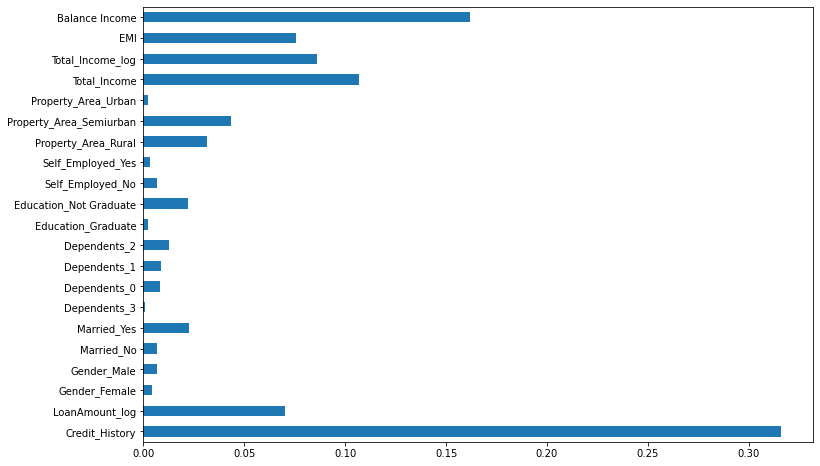

In [63]:
importances= pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

Credit_History is the most important, followed by the features created by feature engineering.

## XGBOOST

In [64]:
from xgboost import XGBClassifier

i=1 
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold{}'. format(i, kf.n_splits))
    xtr,xvl= X.loc[train_index], X.loc[test_index]
    ytr,yvl = y[train_index], y[test_index]
    
    model = XGBClassifier(max_depth=4, n_estimators=50)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score=accuracy_score(yvl, pred_test)
    print('XGboost accuracy_score:', score)
    
    i+=1
    pred_test=model.predict(test)
    pred3=model.predict_proba(test)[:,1]


1 of kfold5
XGboost accuracy_score: 0.7886178861788617

2 of kfold5
XGboost accuracy_score: 0.8292682926829268

3 of kfold5
XGboost accuracy_score: 0.7804878048780488

4 of kfold5
XGboost accuracy_score: 0.8048780487804879

5 of kfold5
XGboost accuracy_score: 0.7786885245901639


In [65]:
#fill the columns with Loan_Status of pred_test
submission_XGB=submission.copy() #make a copy of the submission file so that its contents isn't altered

submission_XGB['Loan_Status']=pred_test

#replace the dummy variables
submission_XGB['Loan_Status'].replace(0, 'N', inplace=True)
submission_XGB['Loan_Status'].replace(1, 'Y', inplace=True)

#convert submission file to .csv format
from IPython.display import HTML
import pandas as pd
import base64, io

# Download as CSV: data frame, optional title and filename
def create_download_link_csv(df, title = "Download CSV file", filename = "XGBoost.csv"):  
    # generate in-memory CSV, then base64-encode it
    csv = df.to_csv(index=True)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

# Download as CSV
create_download_link_csv(submission_XGB,"Download my data","XGBoost.csv")

From the leaderboard, an accuracy of 0.79861 was obtained for the XGBoost Model.

## K-Nearest Neighbours (KNN)

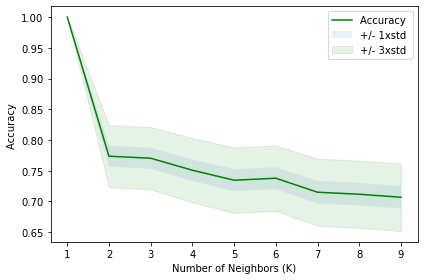

In [66]:
#first select the best value of k
from sklearn.neighbors import KNeighborsClassifier

Ks=10
mean_acc = np.zeros((Ks-1)) 
std_acc = np.zeros((Ks-1))

for n in range(1,Ks): 
        model= KNeighborsClassifier(n_neighbors = n)
        model.fit(X,y)
        pred_test = model.predict(X)
        mean_acc[n-1] = metrics.accuracy_score(y, pred_test) 
        std_acc[n-1]=np.std(y==pred_test)/np.sqrt(y.shape[0]) 
        mean_acc
   
    
#plot the accuracy against the K's
plt.plot(range(1,Ks),mean_acc,'g') 
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10) 
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green") 
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd')) 
plt.ylabel('Accuracy ') 
plt.xlabel('Number of Neighbors (K)') 

plt.tight_layout() 

plt.show() 

In [67]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 1.0 with k= 1


Although, the best k is k=1, we'll use the second best k, which is k=3 for building a cross validation KNN model

In [68]:
i=1 
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold{}'. format(i, kf.n_splits))
    xtr,xvl= X.loc[train_index], X.loc[test_index]
    ytr,yvl = y[train_index], y[test_index]
    
    model = KNeighborsClassifier(n_neighbors = 3)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score=accuracy_score(yvl, pred_test)
    print('KNeighbors accuracy_score:', score)
    
    i+=1
    pred_test=model.predict(test)
    pred3=model.predict_proba(test)[:,1]


1 of kfold5
KNeighbors accuracy_score: 0.6260162601626016

2 of kfold5
KNeighbors accuracy_score: 0.5934959349593496

3 of kfold5
KNeighbors accuracy_score: 0.5934959349593496

4 of kfold5
KNeighbors accuracy_score: 0.5528455284552846

5 of kfold5
KNeighbors accuracy_score: 0.6147540983606558


In [69]:
#fill the columns with Loan_Status of pred_test
submission_KNN=submission.copy() #make a copy of the submission file so that its contents isn't altered

submission_KNN['Loan_Status']=pred_test

#replace the dummy variables
submission_KNN['Loan_Status'].replace(0, 'N', inplace=True)
submission_KNN['Loan_Status'].replace(1, 'Y', inplace=True)

#convert submission file to .csv format
from IPython.display import HTML
import pandas as pd
import base64, io

# Download as CSV: data frame, optional title and filename
def create_download_link_csv(df, title = "Download CSV file", filename = "KNeighbours.csv"):  
    # generate in-memory CSV, then base64-encode it
    csv = df.to_csv(index=True)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

# Download as CSV
create_download_link_csv(submission_KNN,"Download my data","KNeighbours.csv")

From the leaderboard, an accuracy of 0.64583 was obtained for the KNearest Neighbours Model.

## Support Vector Machines (SVM)

In [71]:
from sklearn import svm

#make a cross validation SVM model with stratified 5 folds and make predictions
i=1
kf=StratifiedKFold(n_splits=5,random_state=1, shuffle=True) 
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xv1= X.loc[train_index],X.loc[test_index]
    ytr,yv1= y[train_index], y[test_index]
    
    model= svm.SVC(kernel='rbf')
    model.fit(xtr,ytr)
    pred_test= model.predict(xv1)
    score= accuracy_score(yv1, pred_test)
    print('accuracy_score', score)

    i+=1
    pred_test=model.predict(test)


1 of kfold 5
accuracy_score 0.6910569105691057

2 of kfold 5
accuracy_score 0.6910569105691057

3 of kfold 5
accuracy_score 0.6829268292682927

4 of kfold 5
accuracy_score 0.6829268292682927

5 of kfold 5
accuracy_score 0.6721311475409836


In [72]:
#fill the columns with Loan_Status of pred_test
submission_SVM=submission.copy() #make a copy of the submission file so that its contents isn't altered

submission_SVM['Loan_Status']=pred_test

#replace the dummy variables
submission_SVM['Loan_Status'].replace(0, 'N', inplace=True)
submission_SVM['Loan_Status'].replace(1, 'Y', inplace=True)

#convert submission file to .csv format
from IPython.display import HTML
import pandas as pd
import base64, io

# Download as CSV: data frame, optional title and filename
def create_download_link_csv(df, title = "Download CSV file", filename = "SVM.csv"):  
    # generate in-memory CSV, then base64-encode it
    csv = df.to_csv(index=True)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

# Download as CSV
create_download_link_csv(submission_SVM,"Download my data","SVM.csv")

From the leaderboard, an accuracy of 0.70833 was obtained for the SVM Model.


Therefore, the best accuracy so far after trying and testing the 6 different algorithms on the leaderboard is XGBoost (0.79861), followed by RandomForest (0.78472) and then Logistic Regression (0.7222)